In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import os
import pandas as pd
from datetime import datetime
from dotenv import load_dotenv, find_dotenv
from pathlib import Path
from src.func import tweet_utils
from src.func import regex
from src.func import labmtgen
from src.sentiment.senti_utils import *
from labMTsimple.storyLab import *
import random
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from shapely.geometry import Point, Polygon, MultiPolygon

In [10]:
tweet_dir= Path("../data/processed/park_user_tweets/")
#city = Path("../data/processed/tweets/CO_Denver_0820000.json")

In [11]:
for city in tweet_dir.glob("*.json"):
    city_name = city.stem
    print(city_name)

CO_Denver_0820000
AZ_Phoenix_0455000
FL_Jacksonville_1235000
TX_Austin_4805000
TX_Fort_Worth_4827000
TX_El_Paso_4824000
CA_San_Diego_0666000
TN_Memphis_4748000
DC_Washington_1150000
WA_Seattle_5363000
IL_Chicago_1714000
TX_Houston_4835000
MA_Boston_2507000
MI_Detroit_2622000
NC_Charlotte_3712000
NY_New_York_3651000
IN_Indianapolis_1836003
TX_San_Antonio_4865000
TX_Dallas_4819000
OH_Columbus_3918000
PA_Philadelphia_4260000
CA_Los_Angeles_0644000
MD_Baltimore_2404000
CA_San_Jose_0668000
CA_San_Francisco_0667000


In [12]:
city = tweet_dir / "PA_Philadelphia_4260000.json"
with open(city, 'r') as f:
    tweets = json.load(f)

In [15]:
tweets[list(tweets.keys())[5]]

[{'ParkID': '42600000373',
  'Park_Name': 'West Fairmount Park',
  'control_text': '@brrrixO so uncalled for you bitch',
  'id': 454233661001715700,
  'id_str': 454233661001715712,
  'index_right': 16254.0,
  'pure_text': 'Me vs. Traffic. Every morning.',
  'tweet_created_at': '2014-04-10 12:25:18',
  'user': {'id': 1000608614,
   'id_str': '1000608614',
   'location': 'Philadelphia/Avalon'}},
 {'ParkID': nan,
  'Park_Name': nan,
  'id': 454335775728218100,
  'id_str': 454335775728218112,
  'index_right': nan,
  'pure_text': 'Perfect weather to take in a Phillies game and laugh at all the girls in shorts that are freezing by the top of the 2nd.',
  'tweet_created_at': '2014-04-10 19:11:04',
  'user': {'id': 1000608614,
   'id_str': '1000608614',
   'location': 'Philadelphia/Avalon'}},
 {'ParkID': nan,
  'Park_Name': nan,
  'id': 451177460349288450,
  'id_str': 451177460349288448,
  'index_right': nan,
  'pure_text': 'Update: we compromised and only ran 2 miles. #blessed',
  'tweet_crea

In [99]:
date_list = []
date_geo = []

In [60]:
for tweet in tweets:
    ts = tweet['tweet_created_at']
    date_list.append(datetime.strptime(ts, '%Y-%m-%d %H:%M:%S').date())

In [100]:
with open(city, 'r') as f:
    tweets = json.load(f)
    ../data/processed/park_user_tweets/IL_Chicago_1714000.json
    for tweet in tweets:
    ts = tweet['tweet_created_at']
    date_str = datetime.strptime(ts, '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d')
    p = Point(tweet['geo']['coordinates'][1],tweet['geo']['coordinates'][0])
    date_geo.append([date_str,p])


In [101]:
date_geo[0]

['2015-04-12', <shapely.geometry.point.Point at 0x136b2f8d0>]

In [61]:
c = Counter(date_list)
c_dict = dict(c)

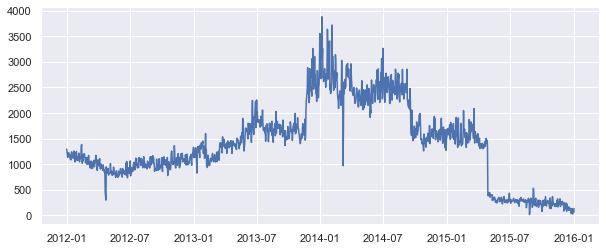

In [86]:
f, ax = plt.subplots(figsize=(10,4))
date_count = sorted(c_dict.items())
g = sns.lineplot(*zip(*date_count))


plt.savefig('phil_timefreq.png')

In [64]:
c.items

<function Counter.items>

In [84]:
ra = pd.date_range(datetime(2015,4,1).date(), datetime(2015,6,1).date(), freq='D')
for day in ra:
    print(day.date(), c[day.date()])

2015-04-01 1498
2015-04-02 1354
2015-04-03 1463
2015-04-04 1504
2015-04-05 1306
2015-04-06 1340
2015-04-07 1350
2015-04-08 1399
2015-04-09 1367
2015-04-10 1319
2015-04-11 1332
2015-04-12 1407
2015-04-13 1303
2015-04-14 1321
2015-04-15 1319
2015-04-16 1315
2015-04-17 1384
2015-04-18 1341
2015-04-19 1434
2015-04-20 1370
2015-04-21 1349
2015-04-22 1490
2015-04-23 1503
2015-04-24 1421
2015-04-25 1430
2015-04-26 1465
2015-04-27 1347
2015-04-28 422
2015-04-29 381
2015-04-30 408
2015-05-01 434
2015-05-02 406
2015-05-03 446
2015-05-04 353
2015-05-05 357
2015-05-06 389
2015-05-07 399
2015-05-08 403
2015-05-09 391
2015-05-10 403
2015-05-11 289
2015-05-12 336
2015-05-13 345
2015-05-14 302
2015-05-15 310
2015-05-16 358
2015-05-17 349
2015-05-18 344
2015-05-19 298
2015-05-20 254
2015-05-21 302
2015-05-22 271
2015-05-23 277
2015-05-24 241
2015-05-25 272
2015-05-26 258
2015-05-27 320
2015-05-28 327
2015-05-29 350
2015-05-30 347
2015-05-31 330
2015-06-01 278


In [104]:
import geopandas as gpd

In [123]:
for tweet in tweets:
    ts = tweet['tweet_created_at']
    date_str = datetime.strptime(ts, '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d')
    p = Point(tweet['geo']['coordinates'][0],tweet['geo']['coordinates'][1])
    date_geo.append([date_str,p])

In [124]:
df = pd.DataFrame(date_geo, columns=['date','location'])

In [125]:
gdf =  gpd.GeoDataFrame(df, geometry='location')

In [126]:
gdf.head()

,date,location
0,2015-04-12,POINT (40.028183 -75.05737000000001)
1,2015-04-12,POINT (40.029062 -75.058246)
2,2015-04-12,POINT (39.987854 -75.184445)
3,2015-04-12,POINT (40.014393 -75.069661)
4,2015-04-12,POINT (39.987826 -75.184342)


In [127]:
len(gdf)

4053782

In [130]:
gdf_1000 = gdf.sample(1000)
gdf_1000.to_file("phil_tweets.shp")